In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Load Food-101 Dataset
data_dir = tf.keras.utils.get_file(
    'food-101.tar.gz', 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz', extract=True)
data_dir = os.path.join(os.path.dirname(data_dir),'food-101_extracted', 'food-101', 'images')

# Data Preprocessing
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training')

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation')

# Load Pre-trained Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Custom Layers
global_avg = GlobalAveragePooling2D()(base_model.output)
dropout = Dropout(0.2)(global_avg)
out_layer = Dense(len(train_generator.class_indices), activation='softmax')(dropout)

model = Model(inputs=base_model.input, outputs=out_layer)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Save Model
model.save('food_recognition_model.h5')

print("Model training complete! Saved as food_recognition_model.h5")


2025-01-31 15:58:46.954927: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-31 15:58:47.115316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738339127.192325   17890 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738339127.217725   17890 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 15:58:47.370663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


I0000 00:00:1738339185.064161   17890 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:64:00.0, compute capability: 8.9


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/home/narasima/anaconda3/envs/tensor_hc/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1738339195.693906   18339 service.cc:148] XLA service 0x7f14e40150c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738339195.694462   18339 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-01-31 15:59:56.044245: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738339197.187198   18339 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-31 15:59:58.7

   1/2525 ━━━━━━━━━━━━━━━━━━━━ 13:51:11 20s/step - accuracy: 0.0312 - loss: 4.7083

I0000 00:00:1738339210.728201   18339 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2500/2525 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0102 - loss: 4.7033

2025-01-31 16:01:43.673780: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2060', 324 bytes spill stores, 320 bytes spill loads

2025-01-31 16:01:43.724168: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2060', 4 bytes spill stores, 4 bytes spill loads

2025-01-31 16:01:44.000049: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2060', 400 bytes spill stores, 400 bytes spill loads

2025-01-31 16:01:44.105344: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2060', 4176 bytes spill stores, 4048 bytes spill loads

2025-01-31 16:02:10.888263: I external/local_xla/xla/s

2525/2525 ━━━━━━━━━━━━━━━━━━━━ 147s 50ms/step - accuracy: 0.0102 - loss: 4.7032 - val_accuracy: 0.0099 - val_loss: 4.7054
Epoch 2/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 111s 44ms/step - accuracy: 0.0105 - loss: 4.7007 - val_accuracy: 0.0099 - val_loss: 4.6768
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 113s 45ms/step - accuracy: 0.0100 - loss: 4.7005 - val_accuracy: 0.0099 - val_loss: 4.6995
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 115s 46ms/step - accuracy: 0.0103 - loss: 4.7023 - val_accuracy: 0.0106 - val_loss: 4.6914
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 107s 42ms/step - accuracy: 0.0099 - loss: 4.6995 - val_accuracy: 0.0123 - val_loss: 4.6930
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 107s 42ms/step - accuracy: 0.0097 - loss: 4.7038 - val_accuracy: 0.0099 - val_loss: 4.6881
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 105s 41ms/step - accuracy: 0.0108 - loss: 4.7016 - val_accuracy: 0.0099 - val_loss: 4.6879
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.0100 - lo

Model training complete! Saved as food_recognition_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


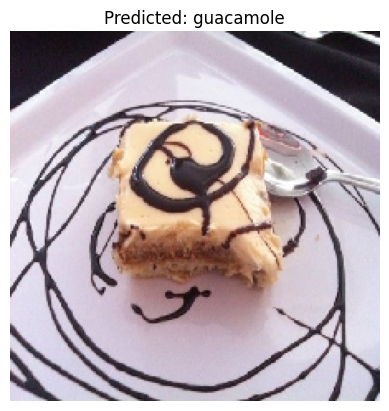

Predicted Label: guacamole


In [8]:
all_images = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.jpg'):
            all_images.append(os.path.join(root, file))

# Pick a random image
random_image_path = random.choice(all_images)

# Load the random image
img = image.load_img(random_image_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Load the trained model
model = tf.keras.models.load_model('food_recognition_model.h5')

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
class_idx = np.argmax(predictions)  # Get the index of the highest prediction score
class_labels = list(train_generator.class_indices.keys())  # Get class labels from the generator

# Get the predicted label
predicted_label = class_labels[class_idx]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Predicted Label: {predicted_label}")